In [177]:
import sys
sys.path.append("..")

import Essentials


In [178]:
import numpy as np

from sklearn.preprocessing import StandardScaler
import Essentials
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from abc import ABC, abstractmethod

In [179]:
a = np.load('C:\\Users\\misha\\PLSSVD\\firs_nikita.npz', allow_pickle=True)

In [180]:
x1 = a['X_test_1']
x2 = a['X_train_1']

y1 = a['Y_test_1']
y2 = a['Y_train_1']

In [181]:
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]
y1 = y1[:, 0].reshape(len(y1), 1).astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1).astype(np.float64)

In [182]:
x2.shape

(91, 96)

In [183]:
x1.shape

(40, 96)

In [184]:
y2.shape

(91, 1)

In [185]:
x_test, x_val, y_test, y_val, timestamp_test, timestamp_val = train_test_split(
    x1, y1, timestamp1, test_size=0.5, random_state=42
)

In [186]:

class PLSSVDSoftSensor(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train, x_test, y_test, max_components=10):
        super().__init__(name)
        self.r2_score = None
        self.best_n_components = None
        self.best_model = None
        self.train(x_train, y_train, x_test, y_test, max_components)

    def preprocessing(self, x):
        return x

    def postprocessing(self, y):
        return y

    def evaluate_model(self, x):
        return self.get_model().predict(x)

    def train(self, x_train, y_train, x_test, y_test, max_components):
        best_score = -np.inf
        best_n_components = 0

        for i in range(1, max_components + 1):
            model = PLSRegression(n_components=i, scale=False)
            model.fit(x_train, y_train)
            score = r2_score(y_test, model.predict(x_test))
            if score > best_score:
                best_score = score
                best_n_components = i
                self.best_model = model

        self.set_model(self.best_model)
        self.best_n_components = best_n_components
        self.r2_score = best_score  # Здесь мы используем тестовый набор данных для вычисления R²

    def __str__(self):
        if self.get_model() is not None:
            coefs_str = ", ".join([f"{coef:.3f}" for coef in self.get_model().coef_.ravel()])
            return (f"Модель PLSSVD с {self.best_n_components} компонентами: \n"
                    f"Коэффициенты: {coefs_str} \n"
                    f"R^2 (тестовая выборка): {self.r2_score}")
        else:
            return "Модель PLSSVD еще не обучена."



In [187]:
Test_sensor_1 = PLSSVDSoftSensor(name='PLS Sensor', x_train=x2, y_train=y2, x_test=x_test, y_test=y_test, max_components=96)

In [188]:
print(Test_sensor_1)

Модель PLSSVD с 17 компонентами: 
Коэффициенты: -0.064, -0.050, -0.040, 0.120, 0.015, 0.018, -0.006, 0.134, -0.011, 0.049, 0.134, -0.012, 0.106, 0.026, 0.002, 0.033, 0.015, 0.032, -0.027, 0.103, 0.145, -0.008, 0.117, 0.014, -0.164, 0.045, -0.299, 0.312, -0.305, -0.407, 0.089, 0.033, -0.071, 0.012, 0.111, 0.049, -0.075, 0.048, 0.158, 0.004, -0.068, -0.149, 0.071, -0.024, 0.025, 0.026, -0.042, -0.032, 0.007, -0.000, -0.037, 0.007, 0.003, 0.006, 0.015, 0.005, -0.017, -0.203, 0.003, 0.038, -0.129, 0.008, 0.003, -0.118, -0.034, 0.039, -0.155, -0.006, -0.120, -0.157, 0.040, -0.028, 0.017, 0.001, -0.107, 0.049, 0.016, -0.123, 0.047, -0.089, 0.245, 0.040, -0.013, 0.019, -0.028, 0.030, -0.008, 0.064, -0.039, 0.012, -0.015, -0.080, 0.000, -0.127, -0.002, -0.001 
R^2 (тестовая выборка): 0.8443669050363832


In [189]:
metric = Essentials.R2Metric()

In [190]:
test_visual = Essentials.Visualizer(x2, y2, timestamp2, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                        0.8846


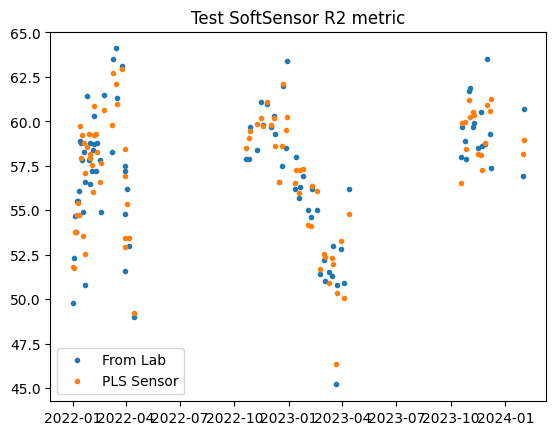

In [191]:
test_visual.visualize([Test_sensor_1])

In [192]:
test_visual_2 = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.844367


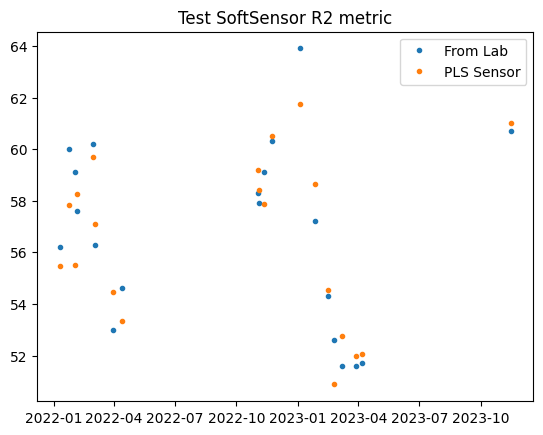

In [193]:
test_visual_2.visualize([Test_sensor_1])

In [194]:
test_visual_4 = Essentials.Visualizer(x_val, y_val, timestamp_val, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.696315


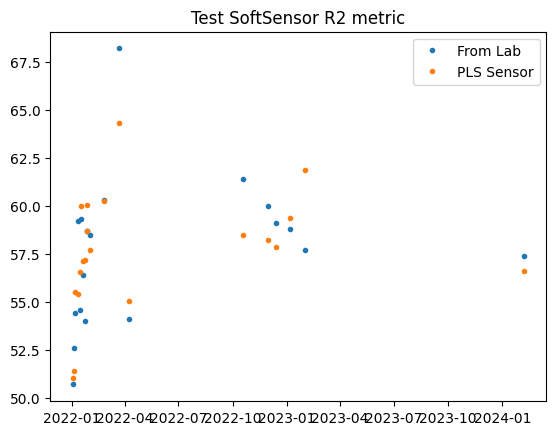

In [195]:
test_visual_4.visualize([Test_sensor_1])

In [196]:
test_visual_3 = Essentials.Visualizer(x1, y1, timestamp1, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.769293


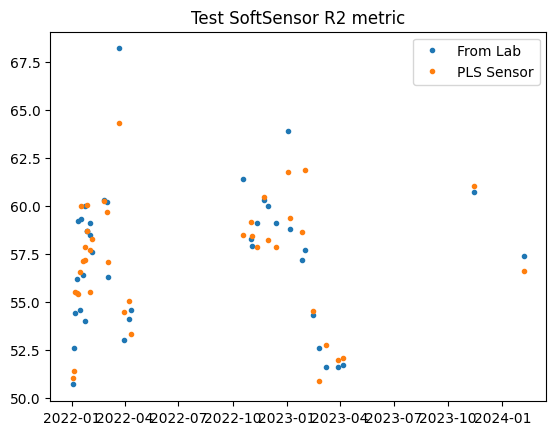

In [197]:
test_visual_3.visualize([Test_sensor_1])